In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import matplotlib.pyplot as plt

In [6]:
df = pd.read_csv('superstore_final_dataset.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9800 entries, 0 to 9799
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row_ID         9800 non-null   int64  
 1   Order_ID       9800 non-null   object 
 2   Order_Date     9800 non-null   object 
 3   Ship_Date      9800 non-null   object 
 4   Ship_Mode      9800 non-null   object 
 5   Customer_ID    9800 non-null   object 
 6   Customer_Name  9800 non-null   object 
 7   Segment        9800 non-null   object 
 8   Country        9800 non-null   object 
 9   City           9800 non-null   object 
 10  State          9800 non-null   object 
 11  Postal_Code    9789 non-null   float64
 12  Region         9800 non-null   object 
 13  Product_ID     9800 non-null   object 
 14  Category       9800 non-null   object 
 15  Sub_Category   9800 non-null   object 
 16  Product_Name   9800 non-null   object 
 17  Sales          9800 non-null   float64
dtypes: float

In [7]:
# Step 1: Removing duplicate rows
df = df.drop_duplicates(subset=df.columns.difference(['Row_ID']))

# Step 2: Removing rows with missing values
df = df.dropna()

# Step 3: Remove irrelevant values and validate date columns
df['Order_Date'] = pd.to_datetime(df['Order_Date'], errors='coerce')
df['Ship_Date'] = pd.to_datetime(df['Ship_Date'], errors='coerce')
df = df[df['Ship_Date'] >= df['Order_Date']]

df.info()

# Step 4: Export cleaned dataset as a CSV file
#df.to_csv('superstore_final_dataset.csv', encoding='utf-8', index=False)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8104 entries, 0 to 9795
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Row_ID         8104 non-null   int64         
 1   Order_ID       8104 non-null   object        
 2   Order_Date     8104 non-null   datetime64[ns]
 3   Ship_Date      8104 non-null   datetime64[ns]
 4   Ship_Mode      8104 non-null   object        
 5   Customer_ID    8104 non-null   object        
 6   Customer_Name  8104 non-null   object        
 7   Segment        8104 non-null   object        
 8   Country        8104 non-null   object        
 9   City           8104 non-null   object        
 10  State          8104 non-null   object        
 11  Postal_Code    8104 non-null   float64       
 12  Region         8104 non-null   object        
 13  Product_ID     8104 non-null   object        
 14  Category       8104 non-null   object        
 15  Sub_Category   8104 n

In [10]:
# What percentage of total orders were shipped on the same date?

# Count orders with the same order date and ship date
same_date_orders = df[df['Order_Date'] == df['Ship_Date']]
same_date_count = len(same_date_orders)

# Calculate total number of orders
total_orders = len(df)

# Calculate the percentage
percentage_same_date = (same_date_count / total_orders) * 100

# Print the percentage
print(f"Percentage of orders shipped on the same date: {percentage_same_date:.2f}%")

Percentage of orders shipped on the same date: 6.34%


In [12]:
# Name top 3 customers with highest total value of orders.

# Calculate the total value of orders for each customer
customer_orders = df.groupby('Customer_Name')['Sales'].sum()

# Sort the customers based on the total value of orders in descending order
sorted_customers = customer_orders.sort_values(ascending=False)

# Get the top 3 customers
top_3_customers = sorted_customers.head(3)

# Print the top 3 customers
print("Top 3 Customers with the Highest Total Value of Orders:")
print(top_3_customers)

Top 3 Customers with the Highest Total Value of Orders:
Customer_Name
Sean Miller     24516.600
Tamara Chand    19044.906
Raymond Buch    15056.854
Name: Sales, dtype: float64


In [13]:
# Find the top 5 items with the highest average sales per day.

# Convert the 'Order_Date' column to datetime
df['Order_Date'] = pd.to_datetime(df['Order_Date'])

# Group the data by 'Product_Name' and 'Order_Date' and calculate the average sales per day
average_sales_per_day = df.groupby(['Product_Name', 'Order_Date'])['Sales'].mean().reset_index()

# Calculate the average sales per day for each product
average_sales_per_product = average_sales_per_day.groupby('Product_Name')['Sales'].mean()

# Sort the products based on the average sales per day in descending order
sorted_products = average_sales_per_product.sort_values(ascending=False)

# Get the top 5 products
top_5_products = sorted_products.head(5)

# Print the top 5 products with the highest average sales per day
print("Top 5 Items with the Highest Average Sales per Day:")
print(top_5_products)

Top 5 Items with the Highest Average Sales per Day:
Product_Name
Cisco TelePresence System EX90 Videoconferencing Unit       22638.4800
Canon imageCLASS 2200 Advanced Copier                       12319.9648
Cubify CubeX 3D Printer Triple Head Print                    7999.9800
3D Systems Cube Printer, 2nd Generation, Magenta             7149.9450
HP Designjet T520 Inkjet Large Format Printer - 24 Color     6124.9650
Name: Sales, dtype: float64



Top 5 Customers:
Customer_Name
Tom Ashbrook        2301.295000
Mitch Willingham    1751.292000
Sean Miller         1751.185714
Tamara Chand        1731.355091
Grant Thornton      1558.535333
Name: Sales, dtype: float64


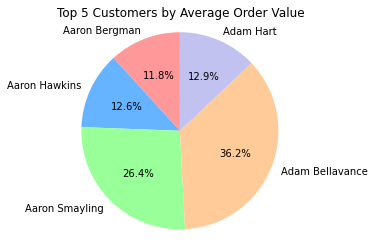

In [21]:
# Calculate the average order value for each customer
average_order_value = df.groupby('Customer_Name')['Sales'].mean()

# Rank the customers by their average order value
ranked_customers = average_order_value.rank(ascending=False)

# Get the top 5 customers
top_5_customers = average_order_value.nlargest(5)

# Print the top 5 customers
print("\nTop 5 Customers:")
print(top_5_customers)

# Visualize the top 5 customers with a pie chart
top_5_customers = average_order_value.head(5)

labels = top_5_customers.index
sizes = top_5_customers.values
colors = ['#ff9999', '#66b3ff', '#99ff99', '#ffcc99', '#c2c2f0']

plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)
plt.axis('equal')
plt.title('Top 5 Customers by Average Order Value')
plt.show()

In [25]:
# Give the name of customers who ordered highest and lowest orders from each city.

# Calculate the total order value for each customer in each city
customer_order_value = df.groupby(['City', 'Customer_Name'])['Sales'].sum()

# Find the customer with the highest order value in each city
highest_order_customers = customer_order_value.groupby('City').idxmax().apply(lambda x: x[1])

# Find the customer with the lowest order value in each city
lowest_order_customers = customer_order_value.groupby('City').idxmin().apply(lambda x: x[1])

# Print the customers with the highest and lowest orders from each city
print("Customers with Highest and Lowest Orders from Each City:")
for city in df['City'].unique():
    highest_order_customer = highest_order_customers[city]
    lowest_order_customer = lowest_order_customers[city]
    print(f"City: {city}")
    print(f"Highest Order Customer: {highest_order_customer}")
    print(f"Lowest Order Customer: {lowest_order_customer}")
    print()

Customers with Highest and Lowest Orders from Each City:
City: Henderson
Highest Order Customer: Maria Etezadi
Lowest Order Customer: Kimberly Carter

City: Concord
Highest Order Customer: Joseph Holt
Lowest Order Customer: Andrew Allen

City: Seattle
Highest Order Customer: Raymond Buch
Lowest Order Customer: Nick Zandusky

City: Fort Worth
Highest Order Customer: Tonja Turnell
Lowest Order Customer: Larry Blacks

City: Madison
Highest Order Customer: Resi Pölking
Lowest Order Customer: Sonia Sunley

City: West Jordan
Highest Order Customer: Sanjit Chand
Lowest Order Customer: Alejandro Grove

City: Fremont
Highest Order Customer: Yoseph Carroll
Lowest Order Customer: Rick Bensley

City: Philadelphia
Highest Order Customer: Christopher Conant
Lowest Order Customer: Jas OCarroll

City: Orem
Highest Order Customer: Emily Burns
Lowest Order Customer: Stuart Van

City: Los Angeles
Highest Order Customer: Robert Marley
Lowest Order Customer: Stuart Calhoun

City: Houston
Highest Order Cust

In [26]:
# What is the most demanded sub-category in the west region?

# Filter the dataset for the West region
west_region = df[df['Region'] == 'West']

# Count the occurrences of each sub-category in the West region
sub_category_counts = west_region['Sub_Category'].value_counts()

# Get the most demanded sub-category in the West region
most_demanded_sub_category = sub_category_counts.idxmax()

print("Most Demanded Sub-Category in the West Region:", most_demanded_sub_category)

Most Demanded Sub-Category in the West Region: Binders


In [29]:
# Which order has the highest number of items? And which order has the highest cumulative value?

# Find the order with the highest number of items
order_highest_items = df.loc[df['Sales'].idxmax(), 'Order_ID']

# Find the order with the highest cumulative value
order_highest_cumulative_value = df.groupby('Order_ID')['Sales'].sum().idxmax()

print("Order with the Highest Number of Items:", order_highest_items)
print("Order with the Highest Cumulative Value:", order_highest_cumulative_value)

Order with the Highest Number of Items: CA-2015-145317
Order with the Highest Cumulative Value: CA-2015-145317


In [28]:
print(df.columns)

Index(['Row_ID', 'Order_ID', 'Order_Date', 'Ship_Date', 'Ship_Mode',
       'Customer_ID', 'Customer_Name', 'Segment', 'Country', 'City', 'State',
       'Postal_Code', 'Region', 'Product_ID', 'Category', 'Sub_Category',
       'Product_Name', 'Sales'],
      dtype='object')


In [30]:
# Which order has the highest cumulative value?

# Calculate the cumulative value for each order
order_cumulative_value = df.groupby('Order_ID')['Sales'].sum()

# Find the order with the highest cumulative value
order_highest_cumulative_value = order_cumulative_value.idxmax()

print("Order with the Highest Cumulative Value:", order_highest_cumulative_value)

Order with the Highest Cumulative Value: CA-2015-145317


In [31]:
# Which segment’s order is more likely to be shipped via first class?

# Filter the dataset for orders shipped via first class
first_class_orders = df[df['Ship_Mode'] == 'First Class']

# Count the occurrences of each segment in the first class orders
segment_counts = first_class_orders['Segment'].value_counts()

# Get the segment with the highest occurrence in the first class orders
most_likely_segment = segment_counts.idxmax()

print("Segment More Likely to be Shipped via First Class:", most_likely_segment)

Segment More Likely to be Shipped via First Class: Consumer


In [32]:
# Which city is least contributing to total revenue?

# Calculate the total revenue for each city
city_revenue = df.groupby('City')['Sales'].sum()

# Find the city with the least total revenue
least_contributing_city = city_revenue.idxmin()

print("City Least Contributing to Total Revenue:", least_contributing_city)

City Least Contributing to Total Revenue: Abilene


In [33]:
# What is the average time for orders to get shipped after order is placed?

# Convert the 'Order_Date' and 'Ship_Date' columns to datetime format
df['Order_Date'] = pd.to_datetime(df['Order_Date'])
df['Ship_Date'] = pd.to_datetime(df['Ship_Date'])

# Calculate the time difference between 'Order_Date' and 'Ship_Date'
df['Time_to_Ship'] = df['Ship_Date'] - df['Order_Date']

# Calculate the average time to ship
average_time_to_ship = df['Time_to_Ship'].mean()

# Convert the average time to ship to days
average_time_to_ship = average_time_to_ship.days

print("Average Time for Orders to Get Shipped After Order is Placed:", average_time_to_ship, "days")

Average Time for Orders to Get Shipped After Order is Placed: 41 days


In [34]:
# Which segment places the highest number of orders from each state and which segment places the largest 
# individual orders from each state?

# Find the segment that places the highest number of orders from each state
segment_with_highest_orders = df.groupby(['State', 'Segment'])['Order_ID'].count().reset_index()
segment_with_highest_orders = segment_with_highest_orders.sort_values(by='Order_ID', ascending=False)
segment_with_highest_orders = segment_with_highest_orders.groupby('State').first()

# Find the segment that places the largest individual orders from each state
segment_with_largest_orders = df.groupby(['State', 'Segment'])['Sales'].sum().reset_index()
segment_with_largest_orders = segment_with_largest_orders.sort_values(by='Sales', ascending=False)
segment_with_largest_orders = segment_with_largest_orders.groupby('State').first()

print("Segment with the Highest Number of Orders from Each State:")
print(segment_with_highest_orders)

print("\nSegment with the Largest Individual Orders from Each State:")
print(segment_with_largest_orders)

Segment with the Highest Number of Orders from Each State:
                          Segment  Order_ID
State                                      
Alabama                 Corporate        26
Arizona                  Consumer        94
Arkansas                 Consumer        36
California               Consumer       857
Colorado                 Consumer        82
Connecticut              Consumer        31
Delaware                 Consumer        34
District of Columbia  Home Office         1
Florida                  Consumer       149
Georgia                  Consumer        71
Idaho                   Corporate         9
Illinois                 Consumer       228
Indiana                  Consumer        57
Iowa                    Corporate         9
Kansas                  Corporate         7
Kentucky                 Consumer        62
Louisiana                Consumer        17
Maine                   Corporate         5
Maryland                Corporate        38
Massachusetts    

In [36]:
# Find all the customers who individually ordered on 3 consecutive days where each day’s total order was more than 
# 50 in value.

# Convert the 'Order_Date' column to datetime format
df['Order_Date'] = pd.to_datetime(df['Order_Date'])

# Sort the dataframe by 'Order_Date' in ascending order
df = df.sort_values('Order_Date')

# Group the dataframe by 'Customer_Name' and 'Order_Date' and calculate the sum of 'Sales'
customer_daily_sales = df.groupby(['Customer_Name', 'Order_Date'])['Sales'].sum().reset_index()

# Find the customers who individually ordered on 3 consecutive days where each day's total order was more than 50 in value
target_customers = customer_daily_sales.groupby('Customer_Name').filter(lambda x: x['Sales'].rolling(3).sum().min() > 50)

# Get unique customer names
target_customers = target_customers['Customer_Name'].unique()

print("Customers who Individually Ordered on 3 Consecutive Days with Order Value > 50:")
print(target_customers)

Customers who Individually Ordered on 3 Consecutive Days with Order Value > 50:
['Aaron Bergman' 'Aaron Hawkins' 'Aaron Smayling' 'Adam Bellavance'
 'Adam Hart' 'Adam Shillingsburg' 'Adrian Barton' 'Adrian Hane'
 'Aimee Bixby' 'Alan Barnes' 'Alan Dominguez' 'Alan Haines' 'Alan Hwang'
 'Alan Schoenberger' 'Alan Shonely' 'Alejandro Ballentine'
 'Alejandro Grove' 'Alejandro Savely' 'Aleksandra Gannaway' 'Alex Avila'
 'Alex Grayson' 'Alice McCarthy' 'Allen Armold' 'Allen Goldenen'
 'Allen Rosenblatt' 'Amy Cox' 'Amy Hunt' 'Andrew Allen' 'Andrew Gjertsen'
 'Andrew Roberts' 'Andy Gerbode' 'Andy Reiter' 'Andy Yotov' 'Angele Hood'
 'Ann Blume' 'Ann Chong' 'Anna Andreadi' 'Anna Chung' 'Anna Gayman'
 'Anna Häberlin' 'Anne McFarland' 'Anne Pryor' 'Annie Thurman'
 'Annie Zypern' 'Anthony Garverick' 'Anthony Jacobs' 'Anthony Johnson'
 'Anthony Rawles' 'Anthony Witt' 'Arianne Irving' 'Art Ferguson'
 'Arthur Gainer' 'Arthur Prichep' 'Arthur Wiediger' 'Ashley Jarboe'
 'Astrea Jones' 'Barry Blumstein' '

In [37]:
# Find the maximum number of days for which total sales on each day kept rising.

# Convert the 'Order_Date' column to datetime format
df['Order_Date'] = pd.to_datetime(df['Order_Date'])

# Group the dataframe by 'Order_Date' and calculate the sum of 'Sales'
daily_sales = df.groupby('Order_Date')['Sales'].sum().reset_index()

# Initialize variables
rising_days = 0
max_rising_days = 0

# Iterate through the daily sales data
for i in range(1, len(daily_sales)):
    if daily_sales['Sales'].iloc[i] > daily_sales['Sales'].iloc[i - 1]:
        rising_days += 1
        if rising_days > max_rising_days:
            max_rising_days = rising_days
    else:
        rising_days = 0

print("Maximum Number of Days with Rising Total Sales:", max_rising_days)

Maximum Number of Days with Rising Total Sales: 5
